# Lokaverkefni LIRU 2018: Háskólinn í Reykjavík

## Framvindugögn og Framsetning

### Eftir Axel Björnsson, Darra Valgarðsson og Eddu Steinunni Rúnarsdóttur

Það kerfi sem notað er í dag til að reikna greiðslumat umsækjanda í Landsbankanum er gluggaforrit sem keyrir í Windows tölvum, þ.e. Windows Forms client sem er ein eining af safni slíkra gluggaforrita sem saman mynda eitt heildar innrakerfi sem starfsmenn Landsbankans nota daglega í ýmsum tilgangi. Greiðslumatskerfið talar við áreiðanlega vefþjónustu sem talar bæði við gagnagrunn bankans og gagnagrunn á vegum Creditinfo.

Þó greiðslumatskerfið geti gert það sem til er ætlast af því er erfitt að vinna í því. Flæði kerfisins er erfitt, gallar eru til staðar, það er erfitt að eiga endurkvæmt úr ýmsum aðgerðum sem eru framkvæmdar í kerfinu, útlitið er hrátt, ýmist of lítið eða of mikið af upplýsingum er birt hverju sinni og ýmsar skjámyndir kerfisins hafa yfirgnæfandi mikið efni sem gerir það óaðgengilegt. Allt þetta dregur úr virkni og þægindum kerfisins sem getur verið erfitt í daglegri notkun.

Mörg innrakerfi þessa heildar innrakerfis eru einnig erfið að vinna í og því er verið að skoða þann möguleika að koma innrakerfinu í heild sinni á netið þar sem sjálfvirk auðkenning er notuð líkt og í fyrra kerfi, að einingarnar geri það sem til er ætlast af þeim eins og áður, en bætt útlit og bætt flæði í er fyrirrúmi.

Sem fyrsta skref í þessarri aðgerð stendur til að setja eitt þessarra gluggaforrita á vefinn, það er greiðslumatskerfið. Það skal hafa bætt útliti, flæði og virkni. Teymið hefur tekið þetta verkefni að sér og er það lokaverkefni í Háskólanum í Reykjavík. Sjái teymið fram á að geta tekið að sér stærra umfang á meðan á lokaverkefninu stendur er möguleiki á að útvíkkun verði á verkefninu. Þá mun teymið hefja samþættingu á heildar innrakerfinu yfir á vefinn. Hvort sem tími gefst í það eða ekki þarf teymið að hafa huga í sinni vinnu að greiðslumatskerfið mun mögulega vera samþætt inn í heildar innrakerfið síðar meir ef það verður skrifað yfir á vefinn líka.

Eftirfarandi skjal inniheldur öll gögn um framvindu verkefnisins sem var byggð upp á meðan verkefninu stóð. Gögnin eru sett fram í formi framvindurits (Burndown chart) og verkefnakökuriti (productivity pie) til samantektar á vinnu gerða í spretti í formi stikkorða.


## Nauðsynleg forritunarsöfn sett inn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import plotly as py
import plotly.graph_objs as go
import matplotlib as mpl
import matplotlib.dates as mdates
import datetime
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
import seaborn as sns 
import matplotlib.patches as mpatches
import plotly.plotly as py
import plotly.graph_objs as go

mpl.style.use('seaborn-darkgrid')

## Frumstilling gagna

Tvö gagnasett eru byggð upp. Eitt er framvindugagnasettið sem geymir öll gögn um framvindu, þ.e. unna tíma, forgangssögupunkta sem eftir eru og heildarsögupunkta sem eftir eru og dagsetningar þeirra. og kaffibollagagnasettið sem geymir yfrlit yfir kaffidrykkju á meðan verkefni stendur. Bæði gagnasett eru byggð upp innan þessa skjals til að allar upplýsingar komi sem skýrast fram í skjalinu.

In [2]:
initialStoryPoints = 323
initialPriorityStoryPoints = 298
StoryPointsRemaining = 323
PriorityStoryPointsRemaining = 298
ActualData = {'Entry' : [0], 'Day': ['22/01/2018'], 'Sprint' : [0], 'SPR' : [initialStoryPoints], 'PSPR' : [initialPriorityStoryPoints], 'DayWork' : ['Preparation'], 'Hours' : [2]}
ActualData = pd.DataFrame(data=ActualData)


In [3]:
CoffeTracker = {'Entry': [0], 'Sprint' : [0], 'Weekday' : 'Thursday', 'Edda' : [0], 'Darri' : [0], 'Axel' : [0]}
CoffeTracker = pd.DataFrame(data=CoffeTracker)

## Yfirlýsing og útfærsla fallna til framsetningar og gagnavinnslu

Eftirfarandi eru föll til aðstoðar við framsetningu eða innsetningu gagna

### Gagnasetshjálparföll

Fallð updateDF uppfærir raungögn fyrir framvindugagnasettið

In [4]:
def updateDF(DF, day, sprint, workdone, hours, completedSP=0, completedPSP=0):
    global StoryPointsRemaining, PriorityStoryPointsRemaining
    StoryPointsRemaining -= completedSP
    PriorityStoryPointsRemaining -= completedPSP
    return DF.append({'Entry' : len(ActualData.index), 'Day': day, 'Sprint' : sprint, 'SPR' : StoryPointsRemaining, 'PSPR' : PriorityStoryPointsRemaining, 'DayWork' : workdone, 'Hours' : hours}, ignore_index=True)

Fallið updateCoffe uppfærir raungögn fyrir kaffibollagagnasettið

In [5]:
def updateCoffee(DF, sprint, weekday, edda, darri, axel):
    return DF.append({'Entry' : len(CoffeTracker.index), 'Sprint' : sprint, 'Weekday' : weekday, 'Edda' : edda, 'Darri' : darri, 'Axel' : axel}, ignore_index=True)

### Gagnaframsetningarhjálparföll

Fallið makeMePieChartFromSprint býr til verkefnakökurit fyrir sprett sem sendur er inn sem færibreyta sem tölustafur og táknar sprettsnúmer (0 er upphafssprettur)

In [6]:
# Generates productivity pie chart for a given sprint

def makeMePieChartFromSprint (sprint):
    
    # Frequency table created
    DayWorkDF = ActualData
    DayWorkDF = DayWorkDF[DayWorkDF['Sprint'] == sprint]
    DayWorkDF = DayWorkDF.loc[:, ['DayWork', 'Hours']]
    DayWorkDF = DayWorkDF.groupby(['DayWork'])['Hours'].sum().reset_index()
    DayWorkDF.sort_values(by=['Hours'], ascending=False)
    
    # Pallette
    cpallette = sns.color_palette("husl", 8)

    font = {'size'   : 16}
    plt.rc('font', **font)
    
    plt.pie( DayWorkDF.Hours,
             colors=cpallette,
             autopct='%1.1f%%',
             shadow=False,
             startangle=90 )
    
    plt.legend(DayWorkDF.DayWork, bbox_to_anchor=(1,0), loc="lower right", bbox_transform=plt.gcf().transFigure)
    
    plt.title('Verkefnayfirlit fyrir sprett ' + str(sprint), fontsize=20)
    plt.tight_layout()
    fig = plt.gcf()
    fig.set_size_inches(13,7)
    plt.axis('equal')
    plt.savefig('VerkefnayfirlitSprettur' + str(sprint) + '.jpg')

Fallið plotBurndownChartFromSprint býr til burndown framvindu fyrir sprett sem sendur er inn sem færibreyta sem tölustafur og táknar sprettsnúmer (0 er upphafssprettur). Hann býr einnig til flata línu til að setja fram myndræna framsetningu á sprettsmarkmiði sem er einnig send inn sem færibreyta í fallið.

In [7]:
# PLOTS BURNDOWNCHART FROM SPRINT

def plotBurndownChartFromSprint (sprint, goal) :
    
    ## SETUP FOR NEW BD CHART
    df1 = ActualData
    df1 = df1.drop(['DayWork'], axis=1)
    df1=df1.sort_values(by='Entry', ascending=True)
    df1 = df1.drop(['Entry'], axis=1)
    df2 = df1
    df3 = df1
    df2= df2.groupby(['Day'], sort=False)['Hours'].sum().reset_index()
    df1= df1.groupby(['Day'], sort=False)['PSPR', 'SPR'].min().reset_index()
    df3= df3.groupby(['Day'], sort=False)['Sprint'].min().reset_index()

    resultdf = pd.concat([df1, df2, df3], axis=1)
    resultdf = resultdf.loc[:,~resultdf.columns.duplicated()]
    resultdf = resultdf[resultdf['Sprint'] == sprint].reset_index()

    ax = []

    # Pallette
    cpallette = 'purple'
    AColor = '#99ffeb'
    AAColor = '#00cca3'
    EColor = '#ffcc99'
    EEColor = '#ff9933'

    #create upper subplot
    plt.figure(figsize = (20, 20))
    font = {'size'   : 16}
    plt.rc('font', **font)
    ax.append(plt.subplot(211))
    plt.xticks(range(len(resultdf.Day)), resultdf.Day)
    plt.plot(resultdf.index, resultdf.SPR, '--',
             marker='o',
             color=EColor,
             linewidth=1.9,
             label=resultdf.SPR)
    plt.plot(resultdf.index, resultdf.PSPR,
             marker='o',
             color=AAColor,
             linewidth=1.9,
             label=resultdf.PSPR)
    if(goal != -1):
        plt.axhline(y=goal, color='#FE5F55', linestyle='--')
    plt.ylim(resultdf.PSPR.min()-100,resultdf.SPR.max()+35)
    plt.yticks([])
    plt.fill_between(resultdf.index, resultdf.PSPR, color=AColor, alpha='0.6')
    plt.fill_between(resultdf.index, resultdf.SPR, color=EColor, alpha='0.1')
    for i in range(len(resultdf)):
        plt.text(i, resultdf.SPR[i] + 3, resultdf.SPR[i], ha='center', va='bottom')
        plt.text(i, resultdf.PSPR[i] + 3, resultdf.PSPR[i], ha='center', va='bottom')

    #create plot on secondary y-axis of upper subplot
    ax.append(ax[0].twinx())
    plt.bar( resultdf.index,
             list(resultdf.Hours),
             width=0.2,
             color=cpallette,
             alpha=0.6)
    plt.yticks([])
    for i in range(len(resultdf)):
        plt.text(i, resultdf.Hours[i], resultdf.Hours[i], ha='center', va='bottom')
    plt.ylim(0, 100)
    font = {'size'   : 12}
    plt.rc('font', **font)
    all_patch = mpatches.Patch(color=EEColor, label='Heildarsögupunktar eftir')
    priority_patch = mpatches.Patch(color=AAColor, label='Heildarforgangssögupunktar eftir')
    hours_patch = mpatches.Patch(color='purple', label='Klukkustundir unnar')
    if(goal != -1):
        goal_patch = mpatches.Patch(color='#FE5F55', label='Markmið spretts (forgangssögupunktar)')
        plt.legend(handles=[all_patch, priority_patch, hours_patch, goal_patch], fontsize='large')
    else:
        plt.legend(handles=[all_patch, priority_patch, hours_patch], fontsize='large')
    plt.title('Burndown Framvindurit fyrir sprett ' + str(sprint), fontsize=20)
    plt.xlabel('Dags', fontsize=12)
    plt.savefig('BurndownSprettur' + str(sprint) + '.jpg')
    plt.show()

Fallið plotBurndownChartForAllSprints teiknar upp framvindurit líkt og fallið að ofan en fyrir allt verkefnið í heild sína, þ.e. alla spretti verkefnisins í einu

In [8]:
# PLOTS BURNDOWNCHART FROM SPRINT

def plotBurndownChartForAllSprints () :
    
    ## SETUP FOR NEW BD CHART
    df1 = ActualData
    df1 = df1.drop(['DayWork'], axis=1)
    df1=df1.sort_values(by='Entry', ascending=True)
    df1 = df1.drop(['Entry'], axis=1)
    df2 = df1
    df3 = df1
    df2= df2.groupby(['Day'], sort=False)['Hours'].sum().reset_index()
    df1= df1.groupby(['Day'], sort=False)['PSPR', 'SPR'].min().reset_index()
    df3= df3.groupby(['Day'], sort=False)['Sprint'].min().reset_index()

    resultdf = pd.concat([df1, df2, df3], axis=1)
    resultdf = resultdf.loc[:,~resultdf.columns.duplicated()]

    ax = []

    # Pallette
    cpallette = 'purple'
    AColor = '#99ffeb'
    AAColor = '#00cca3'
    EColor = '#ffcc99'
    EEColor = '#ff9933'

    #create upper subplot
    plt.figure(figsize = (20, 20))
    font = {'size'   : 16}
    plt.rc('font', **font)
    ax.append(plt.subplot(211))
    plt.xticks(range(len(resultdf.Day)), resultdf.Day)
    plt.plot(resultdf.index, resultdf.SPR, '--',
             marker='o',
             color=EColor,
             linewidth=1.9,
             label=resultdf.SPR)
    plt.plot(resultdf.index, resultdf.PSPR,
             marker='o',
             color=AAColor,
             linewidth=1.9,
             label=resultdf.PSPR)
    plt.ylim(resultdf.PSPR.min()-260,resultdf.SPR.max()+55)
    plt.xticks(rotation=90)
    plt.yticks([])
    plt.fill_between(resultdf.index, resultdf.PSPR, color=AColor, alpha='0.6')
    plt.fill_between(resultdf.index, resultdf.SPR, color=EColor, alpha='0.1')
    for i in range(len(resultdf)):
        plt.text(i, resultdf.SPR[i] + 3, resultdf.SPR[i], ha='center', va='bottom')
        plt.text(i, resultdf.PSPR[i] + 3, resultdf.PSPR[i], ha='center', va='bottom')

    #create plot on secondary y-axis of upper subplot
    ax.append(ax[0].twinx())
    plt.bar( resultdf.index,
             list(resultdf.Hours),
             width=0.2,
             color=cpallette,
             alpha=0.6)
    plt.xticks(rotation=90)
    plt.yticks([])
    for i in range(len(resultdf)):
        plt.text(i, resultdf.Hours[i], resultdf.Hours[i], ha='center', va='bottom')
    plt.ylim(0, 100)
    all_patch = mpatches.Patch(color=EEColor, label='Heildarsögupunktar eftir')
    priority_patch = mpatches.Patch(color=AAColor, label='Heildarforgangssögupunktar eftir')
    hours_patch = mpatches.Patch(color='purple', label='Klukkustundir unnar')
    plt.legend(handles=[all_patch, priority_patch, hours_patch], fontsize='large')
    font = {'size'   : 12}
    plt.rc('font', **font)
    plt.title('Burndown Framvindurit fyrir LIRU Lokaverkefni', fontsize=23)
    plt.xlabel('Dags', fontsize=12)
    plt.savefig('Burndown Framvindurit fyrir LIRU Lokaverkefni' + '.jpg')
    plt.show()

Fallið thursdaysVsFridaysCoffeePieChart setur fram mun á kaffineyslu á fimmtudögum og föstudögum meðal teymis

In [9]:
# Generates coffee pie of thursdays vs fridays

def thursdaysVsFridaysCoffeePieChart ():
    
    # Frequency table created
    CoffePie = CoffeTracker
    CoffePie = CoffePie.loc[:, ['Axel', 'Darri', 'Edda', 'Weekday']]
    CoffePie = CoffePie.groupby(['Weekday'])['Axel', 'Darri', 'Edda'].sum().reset_index()
    CoffePie.sort_values(by=['Weekday'], ascending=False)
    CoffePie['totalCoffee'] = CoffePie.apply(lambda row: row.Edda + row.Darri + row.Axel, axis=1)
    CoffePie = CoffePie.loc[:, ['Weekday', 'totalCoffee']]
    
    # Pallette
    cpallette = sns.color_palette("husl", 8)

    font = {'size'   : 16}
    plt.rc('font', **font)
    
    plt.bar( CoffePie.Weekday,
             list(CoffePie.totalCoffee),
             color=cpallette)
    
    plt.title('Fimmtudagar vs Föstudagar: Kaffi', fontsize=20)
    plt.tight_layout()
    fig = plt.gcf()
    fig.set_size_inches(7,6)
    #plt.axis('equal')
    plt.savefig('LokaverkefniKaffiFimmtudagarVsFöstudagar.jpg')

Fallið whoWinsCoffeePlot setur fram muninn á kaffineyslu fyrir hvern teymismeðlim fyrir sig

In [10]:
# Generates coffee pie of thursdays vs fridays

def whoWinsCoffeePlot ():
    
    # Frequency table created
    CoffeIndividual = CoffeTracker.groupby(['Weekday'])['Axel', 'Darri', 'Edda'].sum()
    CoffeIndividual = CoffeIndividual.loc[:, ['Axel', 'Darri', 'Edda']].sum().reset_index()
    CoffeIndividual = CoffeIndividual.groupby(['Axel', 'Darri', 'Edda']).sum()
    
    # Pallette
    cpallette = sns.color_palette("husl", 8)

    font = {'size'   : 16}
    plt.rc('font', **font)
        
    plt.bar( CoffeIndividual.index,
             list(CoffeIndividual.loc[:, 0]),
             color=cpallette,)
    
    plt.title('Hver vinnur kaffi?', fontsize=20)
    plt.tight_layout()
    fig = plt.gcf()
    fig.set_size_inches(5,6)
    #plt.axis('equal')
    plt.savefig('LokaverkefniKaffiWinner.jpg')

## Sprettur 0:  Upphafssprettur

Upphafsspretturinn stóð yfir í tvær vikur samkvæmt áætlun, dagana 8. janúar - 22. janúar. Lokaverkefni var fengið hjá Landsbankanum og fundað var tvisvar með tengiliðum bankans um fyrirkomulag og verkefni. Sett var upp beinagrind fyrir verklag; í aðalatriðum var gert ráð fyrir u.þ.b. 16 vinnutímum fyrir hvern hópmeðlim í viku í verkefnið eða tveir heilir vinnudagar í viku, fimmtudag og föstudag. 38 tímar fóru alls í upphafssprettinn sem er um 40% af vinnutíma samkvæmt hinni nýju áætlun. Hins vegar tekur sú prósenta af vinnutíma mið af því að ekki var búið að útvega okkur aðgengi að kerfinu og þar af leiðandi gátum við ekki byrjað að gera kröfulista og frumgerðahönnun. Í staðinn undirbjuggum við skýrslugerð og verklag eftir bestu getu, svo langt sem það náði. 

### Gögn sett inn í gagnasett

In [11]:
## FOR SPRINT 0 ACTUAL DATA
sprint = 0
ActualData = updateDF (ActualData, '08/01/2018', sprint, 'Fundur við fyrirtæki', 3*1)
ActualData = updateDF (ActualData, '15/01/2018', sprint, 'Fundur við fyrirtæki', 3*4)
ActualData = updateDF (ActualData, '17/01/2018', sprint, 'Skýrslugerð', 3)
ActualData = updateDF (ActualData, '17/01/2018', sprint, 'Sniðmát fyrir frumgerðahönnun', 3)
ActualData = updateDF (ActualData, '19/01/2018', sprint, 'Verklagsundirbúningur', 3*5)
ActualData = updateDF (ActualData, '19/01/2018', sprint, 'Skýrslugerð', 2)
# Tjékka hvort passar
print('Total hours spent on sprint ' + str(sprint) + ': ' + str(ActualData[ActualData['Sprint'] == sprint].Hours.sum()))

Total hours spent on sprint 0: 40


### Framsetning gagna

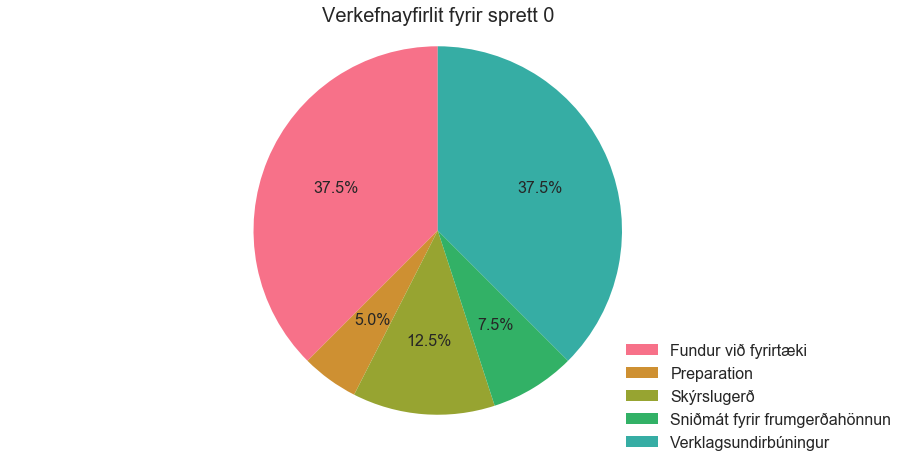

In [12]:
# Plot and save figure from a sprint
makeMePieChartFromSprint(0)
plt.show()

## Sprettur 1

Fyrsti spretturinn stóð yfir í tvær vikur samkvæmt áætlun dagana 22. janúar - 5. febrúar. Í spretti 1 var fyrst og fremst fundað með tengiliðum bankans til að komast vel inn í kerfið, til þess að sammælast um þau tæki og tól sem okkur ber að nota og til þess að sammælast um kröfulista. Sett var upp beinagrind að hönnun sem sjá má í kafla 4.1 sem sýnir grófa mynd af frumgerðum sem voru búnar til sem upphafleg hugsun á hönnun, með fyrirvara um að breyting verði á þeirri hönnun. Upphaflegur kröfulisti var settur saman eins og sjá má í kafla 7.1 en þar eru komnar tæpar 40 kröfur. Enn á eftir að framkvæma sögupunktamat, en það verður gert síðar, eða við upphaf forritunar til þess að mat þeirra verði sem nákvæmast. Alls fóru 94 tímar í sprett 1 sem er um 100% af vinnutíma samkvæmt áætlun.

### Gögn sett inn

In [13]:
## SPRETTUR 1
# 22 jan
ActualData = updateDF (ActualData, '22/01/2018', 1, 'Skýrslugerð', 5*3)
# 26 jan
ActualData = updateDF (ActualData, '26/01/2018', 1, 'Skýrslugerð', 2*3)
ActualData = updateDF (ActualData, '26/01/2018', 1, 'Fundur við fyrirtæki', 4*3)
ActualData = updateDF (ActualData, '26/01/2018', 1, 'Uppsetning þróunartóla', 2*2+1, 2*2+1, 2*2+1) # SETJA UPP ÞRÓUNARUMHV
#29 jan
ActualData = updateDF (ActualData, '29/01/2018', 1, 'Kynningarundirbúningur', 2*3)
#1 feb
ActualData = updateDF (ActualData, '01/02/2018', 1, 'Fundur við fyrirtæki', 8, 8, 8) ## LÆRA Á FYRRA KERFI
ActualData = updateDF (ActualData, '01/02/2018', 1, 'Undirbúningur: Þarfagreining', 2*3)
ActualData = updateDF (ActualData, '01/02/2018', 1, 'Undirbúningur: Frumgerðahönnun', 2*3)
#2 feb
ActualData = updateDF (ActualData, '02/02/2018', 1, 'Fundur við fyrirtæki', 2*3)
ActualData = updateDF (ActualData, '02/02/2018', 1, 'Undirbúningur: Þarfagreining', 3*3)
ActualData = updateDF (ActualData, '02/02/2018', 1, 'Undirbúningur: Frumgerðahönnun', 5*3)
# Tjékka hvort passar
sprint = 1
print('Total hours spent on sprint ' + str(sprint) + ': ' + str(ActualData[ActualData['Sprint'] == sprint].Hours.sum()))

Total hours spent on sprint 1: 94


### Framsetning gagna

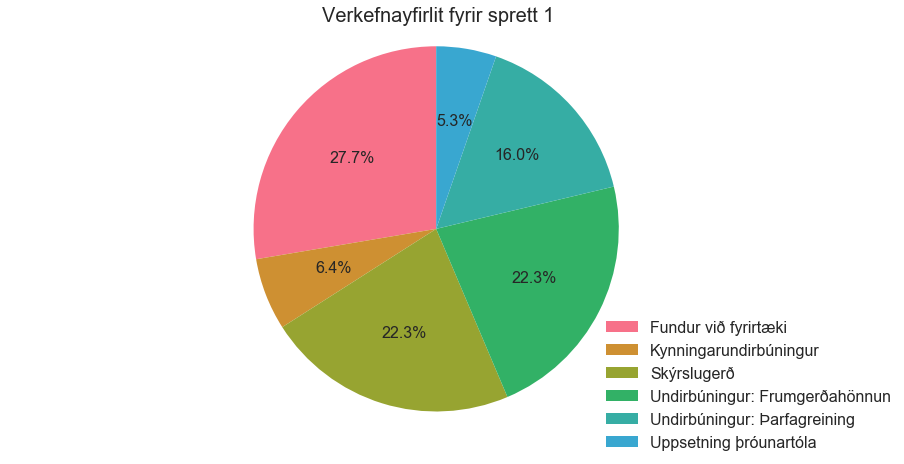

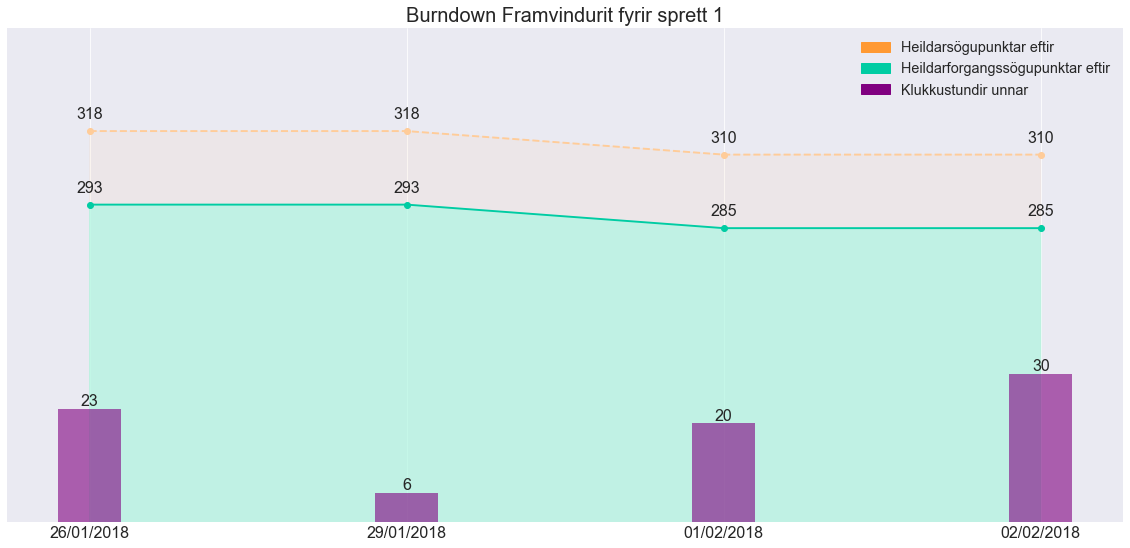

In [14]:
makeMePieChartFromSprint(1)
plotBurndownChartFromSprint(1, -1)
plt.show()

## Sprettur 2

Annar spretturinn stóð yfir í tvær vikur samkvæmt áætlun dagana 5. febrúar - 19. febrúar. Í spretti 2 var fyrst og fremst reynt að hefja forritun með tilheyrandi rannsóknum og upplýsingaöflun á vefþjónustu, forritunarumhverfi og forritunarverkþættir voru brotnir niður. Einu sinni var fundað með tengiliðum bankans til að athuga hvort teymið væri ekki örugglega að gera allt samkvæmt þeirra kröfum. Sett var upp beinagrind að forritunarverkefninu með tilheyrandi þörfum (e. dependencies) og forritunarumhverfi er nú mest uppsett. Byrjað var að forrita eina skjámynd, einstaklingsleit, en gróf hönnun á henni má sjá í kafla 4.1.1. Enn á eftir að framkvæma sögupunktamat, en það verður gert síðar, eða þegar teymið er komið aðeins áleiðis með forritunina þannig að mat þeirra verði sem nákvæmast. Alls fóru 75 tímar í sprett 2 sem er u.þ.b. 80% af vinnutíma samkvæmt áætlun. Teymið tók meðvitaða ákvörðun að vinna aðeins þrjá daga í stað fjóra í sprett 2 (engu að síður langa þrjá vinnudaga) vegna þess að takmörkuð kunnátta á ReactJS kynni að aftra framvindu, svo teymið ákvað að betra væri að kynnast React vel á eigin tíma í þessum spretti til að vera sem afkastamest í þeim næsta.  Teymið mun koma til með að vinna einn aukadag í komandi sprettum í stað þess sem glataðist, í hvaða spretti fer eftir tilmælum bankans og hvenær aðstæða sé laus.

### Gögn sett inn

In [15]:
## SPRETTUR 2
# FEB 9
ActualData = updateDF (ActualData, '09/02/2018', 2, 'Skýrslugerð', 3)
ActualData = updateDF (ActualData, '09/02/2018', 2, 'Skýrslugerð', 3*3, 3, 3)
ActualData = updateDF (ActualData, '09/02/2018', 2, 'Rannsókn (API/ReactJS)', 3*5, 3, 3)
# FEB 15
ActualData = updateDF (ActualData, '15/02/2018', 2, 'Fundur við fyrirtæki', 3*1, 3, 3)
ActualData = updateDF (ActualData, '15/02/2018', 2, 'Uppsetning verkefnis', 3*3, 3, 3)
ActualData = updateDF (ActualData, '15/02/2018', 2, 'Forritun: Tengjast Vefþjónustu', 3*4, 5, 5)
# FEB 16
ActualData = updateDF (ActualData, '16/02/2018', 2, 'Forritun: Einstaklingaleit', 3*6, 10, 10)
ActualData = updateDF (ActualData, '16/02/2018', 2, 'Kynningarundirbúningur', 3*2, 5, 5)
# Tjékka hvort passar
sprint = 2
print('Total hours spent on sprint ' + str(sprint) + ': ' + str(ActualData[ActualData['Sprint'] == sprint].Hours.sum()))

Total hours spent on sprint 2: 75


### Framsetning gagna

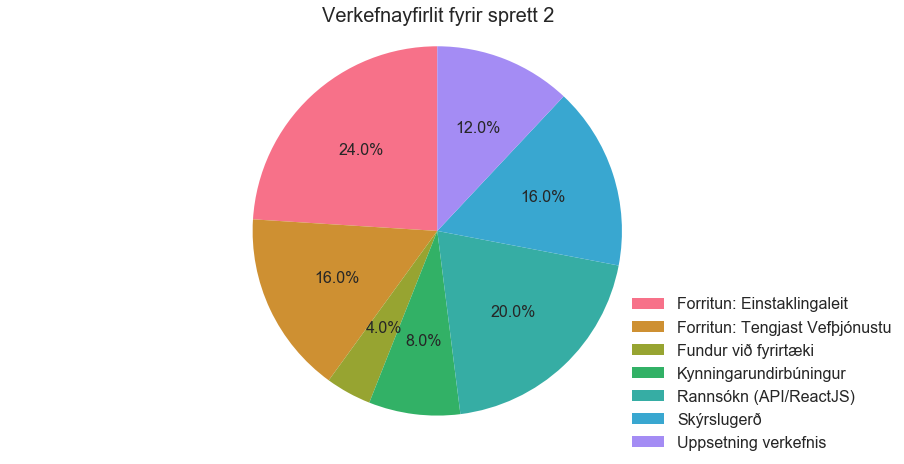

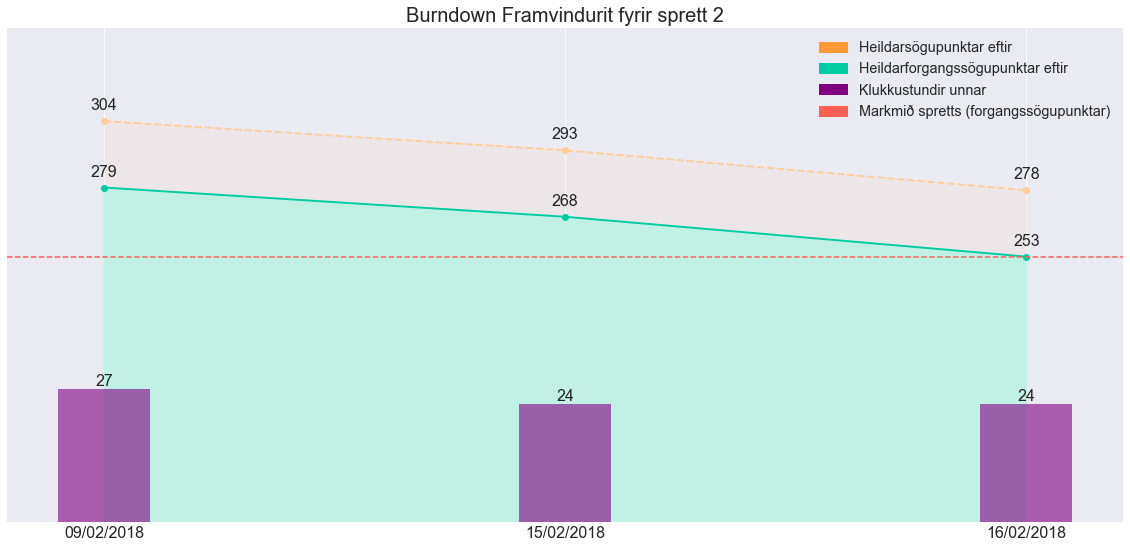

In [16]:
# Burndown and productivity pie from sprint 2
makeMePieChartFromSprint(2)
plotBurndownChartFromSprint(2, 253)
plt.show()

## Sprettur 3

Þriðji spretturinn stóð yfir í tvær vikur samkvæmt áætlun dagana 5. febrúar - 19. febrúar. Í spretti 3 var fyrst og fremst klárað að setja upp sjálvirkt auðkenni/leyfi til að eiga samskipti við gagnagrunninn (API). Það hófst og sett var upp einstaklingaleit og sýnd greiðslumöt fyrir einstaklinga. Auk þess var kóði lagfærður og minniháttar villur lagaðar. Alls foru 75 klukkustundir í sprett 3 sem eru rúm 80% af vinnutíma. Veikindi voru meðal teymisins sem skýrir fjarveruna. 

### Gögn sett inn

In [17]:
## SPRETTUR 3
# FEB 22
ActualData = updateDF (ActualData, '22/02/2018', 3, 'Skýrslugerð: Sögupunktamat', 1)
ActualData = updateDF (ActualData, '22/02/2018', 3, 'Skýrslugerð: Sögupunktamat', 3*3-1)
ActualData = updateDF (ActualData, '22/02/2018', 3, 'Forritun: Einstaklingsleit', 3*2, 4, 4)
ActualData = updateDF (ActualData, '22/02/2018', 3, 'Umhverfi: Continous Integration', 5, 4, 4)
ActualData = updateDF (ActualData, '22/02/2018', 3, 'Forritun: Sjálfvirkt token', 7, 8, 8)
# FEB 23
ActualData = updateDF (ActualData, '23/02/2018', 3, 'Forritun: Sjálfvirkt token', (2*9)+1, 10, 10)
ActualData = updateDF (ActualData, '23/02/2018', 3, 'Forritun: Einstaklingsleit', 9, 5, 5)
# MARCH 1
ActualData = updateDF (ActualData, '01/03/2018', 3, 'Forritun: Einstaklingaleit', 8, 5, 4)
ActualData = updateDF (ActualData, '01/03/2018', 3, 'Forritun: Code Refactor', 8)
# MARCH 2
ActualData = updateDF (ActualData, '02/03/2018', 3, 'Forritun: Bug Fix', 3, 3, 3)
ActualData = updateDF (ActualData, '02/03/2018', 3, 'Forritun: Code Refactor', 2, 2)
ActualData = updateDF (ActualData, '02/03/2018', 3, 'Forritun: Einstaklingsleit', 3, 3, 3)
# Tjékka hvort passar
sprint = 3
print('Total hours spent on sprint ' + str(sprint) + ': ' + str(ActualData[ActualData['Sprint'] == sprint].Hours.sum()))

Total hours spent on sprint 3: 79


### Framsetning gagna

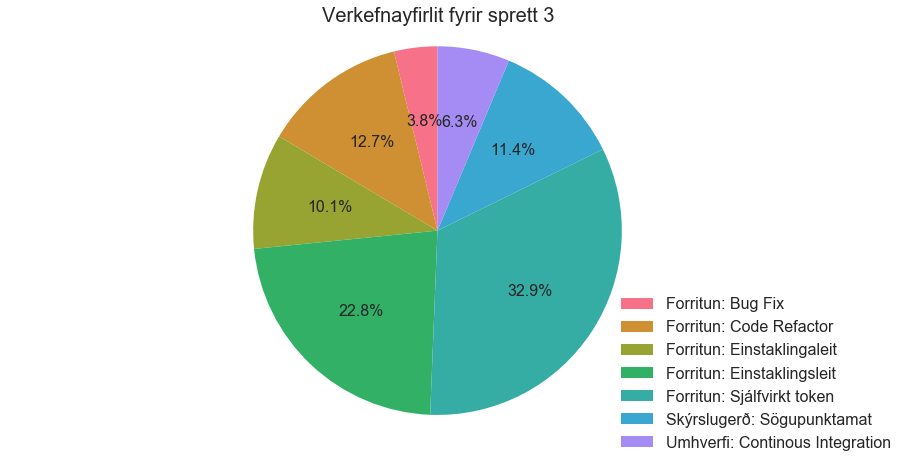

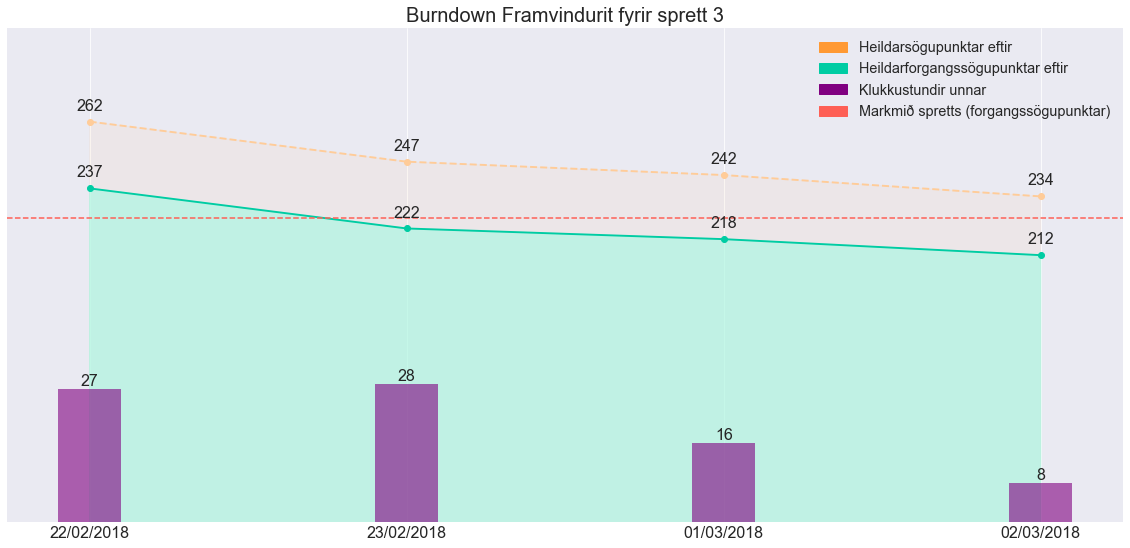

In [18]:
# Burndown and productivity pie from sprint 3
makeMePieChartFromSprint(3)
plotBurndownChartFromSprint(3, 226)
plt.show()

## Sprettur 4

// TODO

### Gögn sett inn

In [19]:
## SPRETTUR 4
sprint = 4
# MAR 8
ActualData = updateDF (ActualData, '08/03/2018', sprint, 'Skýrslugerð', 3*3)
ActualData = updateDF (ActualData, '08/03/2018', sprint, 'Útlit: MaterialUI', 2*3, 2, 2)
ActualData = updateDF (ActualData, '08/03/2018', sprint, 'Forritun: Upplýsingar greiðslumats', 3*3, 7, 7)
# MAR 9
ActualData = updateDF (ActualData, '09/03/2018', sprint, 'Forritun: Upplýsingar greiðslumats', 2*2, 2, 2)
ActualData = updateDF (ActualData, '09/03/2018', sprint, 'Code Refactor', 2*2, 2, 2)
ActualData = updateDF (ActualData, '09/03/2018', sprint, 'Útlit: MaterialUI', 2*2, 2, 2)
ActualData = updateDF (ActualData, '09/03/2018', sprint, 'Code Refactor', 2*2, 2, 2)
# MAR 15
ActualData = updateDF (ActualData, '15/03/2018', sprint, 'Forritun: Upplýsingar greiðslumats', 3*8, 2*8+7, 2*8+6)
# MAR 16
ActualData = updateDF (ActualData, '16/03/2018', sprint, 'Forritun: Upplýsingar greiðslumats', 3*8, 2*8+5, 2*8+5)
# Tjékka hvort passar
print('Total hours spent on sprint ' + str(sprint) + ': ' + str(ActualData[ActualData['Sprint'] == sprint].Hours.sum()))

Total hours spent on sprint 4: 88


### Framsetning gagna

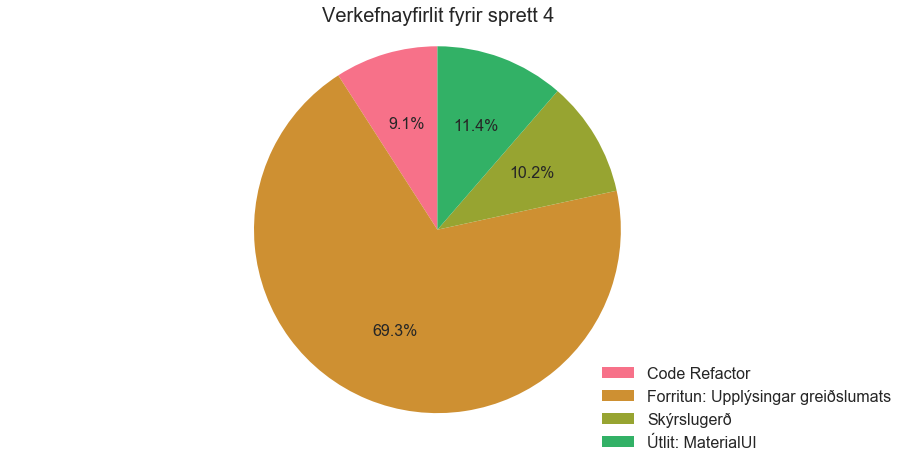

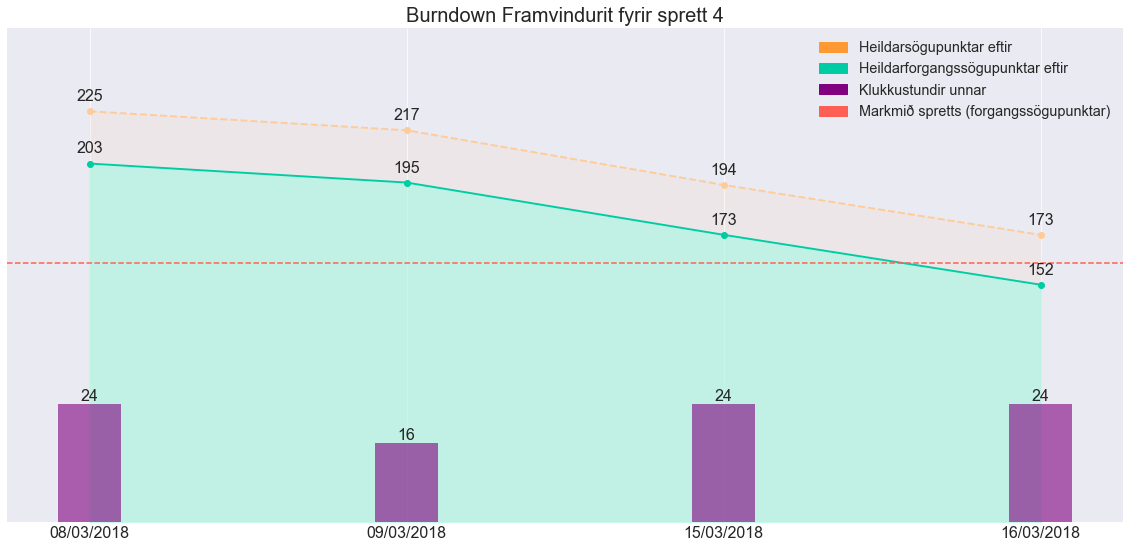

In [20]:
# Burndown and productivity pie from sprint 4
makeMePieChartFromSprint(4)
plotBurndownChartFromSprint(4, 161)
plt.show()

## Sprettur 5

// TODO

### Gögn sett inn

In [21]:
## SPRETTUR 5
## 42 ACHIEVED, 4 NON-PRI AND 46 GOAL
#DF, sprint, workdone, hours, completedSP=0, completedPSP=0
## 44 hrs total
sprint = 5

# MAR 22
ActualData = updateDF (ActualData, '22/03/2018', sprint, 'Útlit: MaterialUI', 5)
ActualData = updateDF (ActualData, '22/03/2018', sprint, 'Forritun: Upplýsingar greiðslumats', 2*8+3, 10, 10)

# MAR 23
ActualData = updateDF (ActualData, '23/03/2018', sprint, 'Forritun: Upplýsingar greiðslumats', 2*8, 6, 6)
ActualData = updateDF (ActualData, '23/03/2018', sprint, 'Útlit: MaterialUI', 4)

# MAR 28 (8*3 tímar)
ActualData = updateDF (ActualData, '28/03/2018', sprint, 'Forritun: Upplýsingar greiðslumats', 3*8, 18, 18)

# APR 5 (2+2+5 timar)
ActualData = updateDF (ActualData, '5/04/2018', sprint, 'Fundur við fyrirtæki', 3*2)
ActualData = updateDF (ActualData, '5/04/2018', sprint, 'Forritun: Upplýsingar greiðslumats', 3, 2, 2)

# APR 6 (10 timar)
ActualData = updateDF (ActualData, '5/04/2018', sprint, 'Forritun: Upplýsingar greiðslumats', 10, 6, 6)

# Tjékka hvort passar
print('Total hours spent on sprint ' + str(sprint) + ': ' + str(ActualData[ActualData['Sprint'] == sprint].Hours.sum()))

Total hours spent on sprint 5: 87


### Framsetning gagna

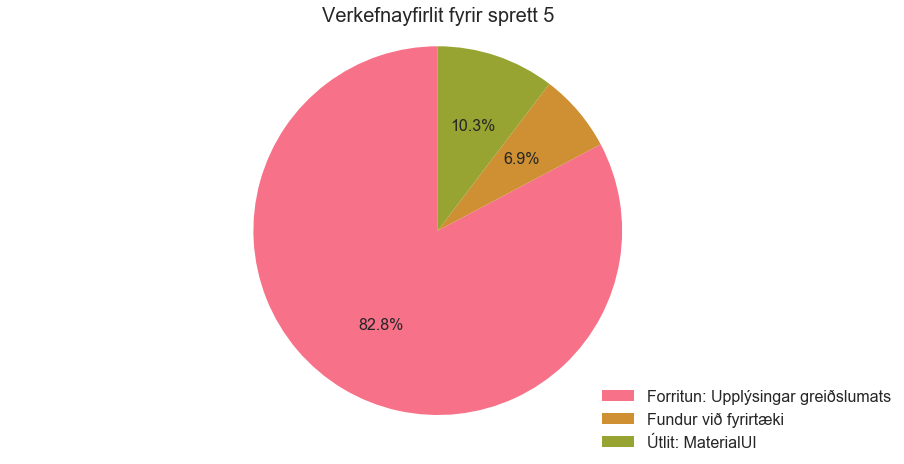

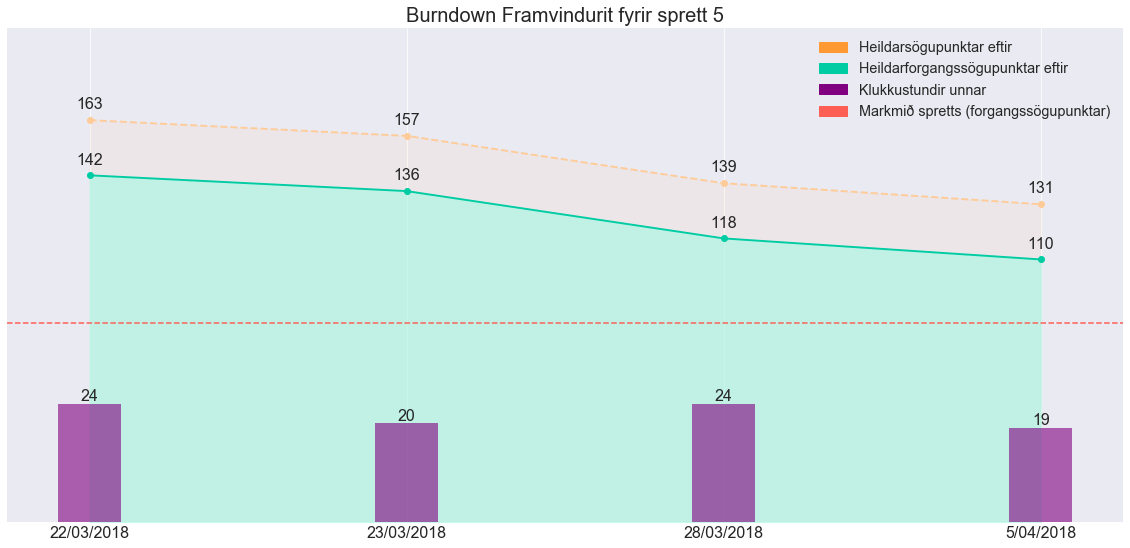

In [22]:
# Burndown and productivity pie from sprint 5
makeMePieChartFromSprint(5)
plotBurndownChartFromSprint(5, 86)
plt.show()

## Sprettur 6

// TODO

### Gögn sett inn

In [23]:
## SPRETTUR 6
sprint = 6
# Apr 23 30 HRS
ActualData = updateDF (ActualData, '23/04/2018', sprint, 'Forritun: Upplýsingar greiðslumats', 10*3, 27, 27)
# Apr 24 36 HRS
ActualData = updateDF (ActualData, '24/04/2018', sprint, 'Forritun: Upplýsingar greiðslumats', 8*3, 15, 15)
ActualData = updateDF (ActualData, '24/04/2018', sprint, 'Útlit: Uppsetning', 4*3)
# Apr 25 30 HRS
ActualData = updateDF (ActualData, '25/04/2018', sprint, 'Forritun: Upplýsingar greiðslumats', 5*3, 18, 18)
ActualData = updateDF (ActualData, '25/04/2018', sprint, 'Útlit: Uppsetning', 5*3)
# Apr 26 36 HRS
ActualData = updateDF (ActualData, '26/04/2018', sprint, 'Forritun: Upplýsingar greiðslumats', 7*3, 20, 20)
ActualData = updateDF (ActualData, '26/04/2018', sprint, 'Útlit: MaterialUI', 5*3)
# Apr 27 30 HRS
ActualData = updateDF (ActualData, '27/04/2018', sprint, 'Forritun: Nýtt greiðslumat', 10*2, 20, 20)
ActualData = updateDF (ActualData, '27/04/2018', sprint, 'Forritun: Prenta út skjöl', 10, 10, 10)
# Apr 28 27 HRS
ActualData = updateDF (ActualData, '28/04/2018', sprint, 'Forritun: Útbúa MockServer', 10)
ActualData = updateDF (ActualData, '28/04/2018', sprint, 'Prófanir: Útbúa notandaprófanir', 10)
ActualData = updateDF (ActualData, '28/04/2018', sprint, 'Útlit: MaterialUI', 7)
# Tjékka hvort passar
print('Total hours spent on sprint ' + str(sprint) + ': ' + str(ActualData[ActualData['Sprint'] == sprint].Hours.sum()))

Total hours spent on sprint 6: 189


### Framsetning gagna

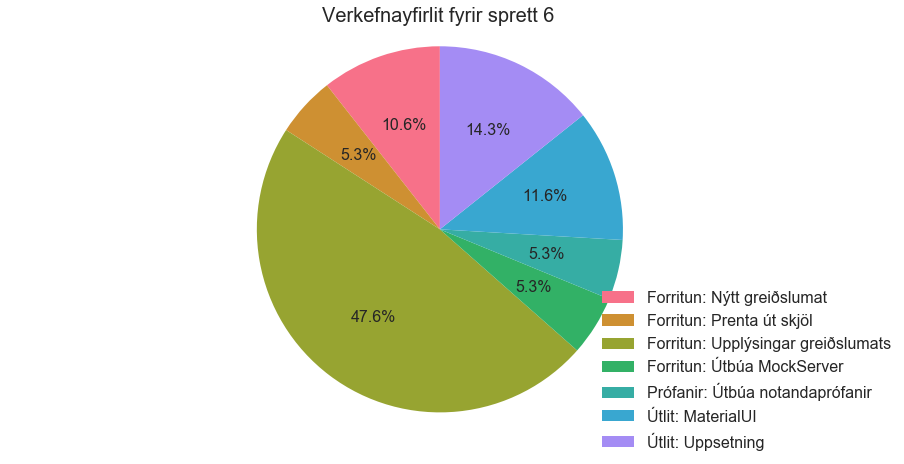

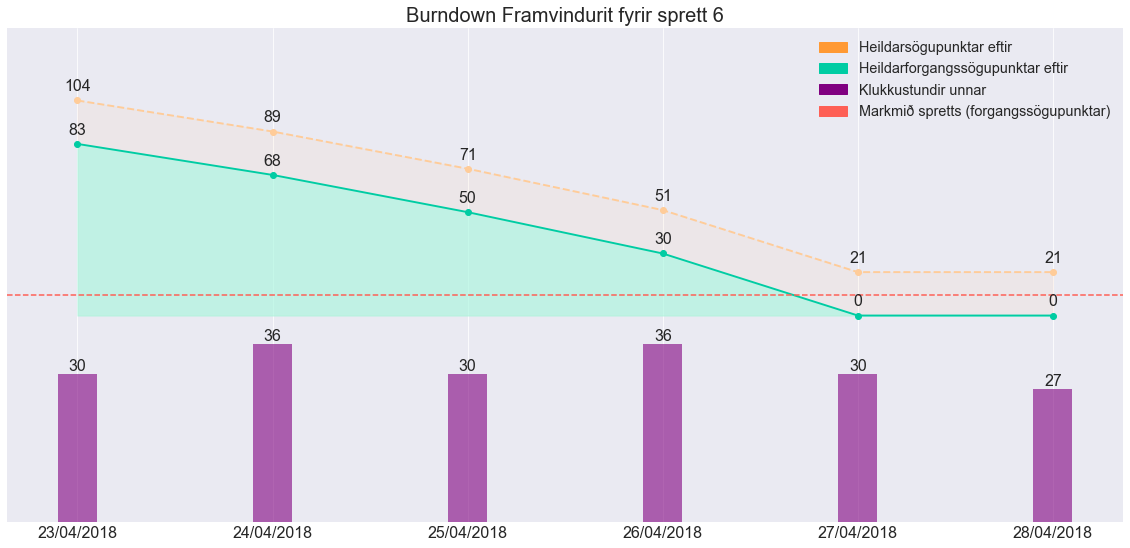

In [24]:
# Burndown from sprint 6
makeMePieChartFromSprint(6)
plotBurndownChartFromSprint(6, 10)
plt.show()

## Kaffineysla á meðan verkefninu stendur

### Gögn sett í gagnasett

In [25]:
# SPRINT 1 COFFEE
# 25 jan
CoffeTracker = updateCoffee(CoffeTracker, 1, 'Thursday', 4, 3, 2)
# 26 jan
CoffeTracker = updateCoffee(CoffeTracker, 1, 'Friday', 2, 2, 2)
#1 feb
CoffeTracker = updateCoffee(CoffeTracker, 1, 'Thursday', 4, 4, 3)
#2 feb
CoffeTracker = updateCoffee(CoffeTracker, 1, 'Friday', 1, 2, 2)

## SPRINT 2 COFFEE
# FEB 9
CoffeTracker = updateCoffee(CoffeTracker, 2, 'Thursday', 1, 2, 2)
# FEB 15
CoffeTracker = updateCoffee(CoffeTracker, 2, 'Friday', 3, 4, 3)
# FEB 16
CoffeTracker = updateCoffee(CoffeTracker, 2, 'Thursday', 2, 3, 0)

## SPRINT 3 COFFEE
# FEB 22
CoffeTracker = updateCoffee(CoffeTracker, 3, 'Thursday', 3, 4, 1)
# FEB 23
CoffeTracker = updateCoffee(CoffeTracker, 3, 'Friday', 2, 3, 1)
# MARCH 1
CoffeTracker = updateCoffee(CoffeTracker, 3, 'Thursday', 3, 0, 1)
# MARCH 2
CoffeTracker = updateCoffee(CoffeTracker, 3, 'Friday', 3, 0, 0)

## SPRINT 4 COFFEE
# MAR 8
CoffeTracker = updateCoffee(CoffeTracker, 4, 'Thursday', 4, 4, 1)
# MAR 9
CoffeTracker = updateCoffee(CoffeTracker, 4, 'Friday', 1, 2, 0)
# MARCH 15
CoffeTracker = updateCoffee(CoffeTracker, 4, 'Thursday', 1, 3, 0)
# MARCH 16
CoffeTracker = updateCoffee(CoffeTracker, 4, 'Friday', 2, 3, 1)

## SPRINT 5 COFFEE (edda/darri/axel)
# MAR 22
CoffeTracker = updateCoffee(CoffeTracker, 5, 'Thursday', 2, 2, 1)
# MAR 23
CoffeTracker = updateCoffee(CoffeTracker, 5, 'Friday', 1, 3, 1)
# MAR 28
CoffeTracker = updateCoffee(CoffeTracker, 5, 'Thursday', 2, 2, 1)
# APR 5
CoffeTracker = updateCoffee(CoffeTracker, 5, 'Thursday', 1, 1, 1)
# APR 6
CoffeTracker = updateCoffee(CoffeTracker, 5, 'Friday', 3, 0, 0)

## SPRINT 6 COFFEE (edda/darri/axel)
# APR 23
CoffeTracker = updateCoffee(CoffeTracker, 6, 'other', 2, 3, 1)
# APR 24
CoffeTracker = updateCoffee(CoffeTracker, 6, 'other', 2, 3, 1)
# APR 25
CoffeTracker = updateCoffee(CoffeTracker, 6, 'other', 2, 3, 1)
# APR 26
CoffeTracker = updateCoffee(CoffeTracker, 6, 'Thursday', 2, 3, 1)
# APR 27
CoffeTracker = updateCoffee(CoffeTracker, 6, 'Friday', 1, 1, 0)

## SPRINT 7 COFFEE (edda/darri/axel)
# APR 30
CoffeTracker = updateCoffee(CoffeTracker, 7, 'other', 3, 3, 1)
# MAY 1
CoffeTracker = updateCoffee(CoffeTracker, 7, 'other', 2, 2, 1)

# Niðurstöður verkefnisins

Eftirfarandi myndir sýna niðurstöður framvindu lokaverkefnis með samantekt af burndown framvinduriti og verkefnakökuriti fyrir verkefnið í heild sína.

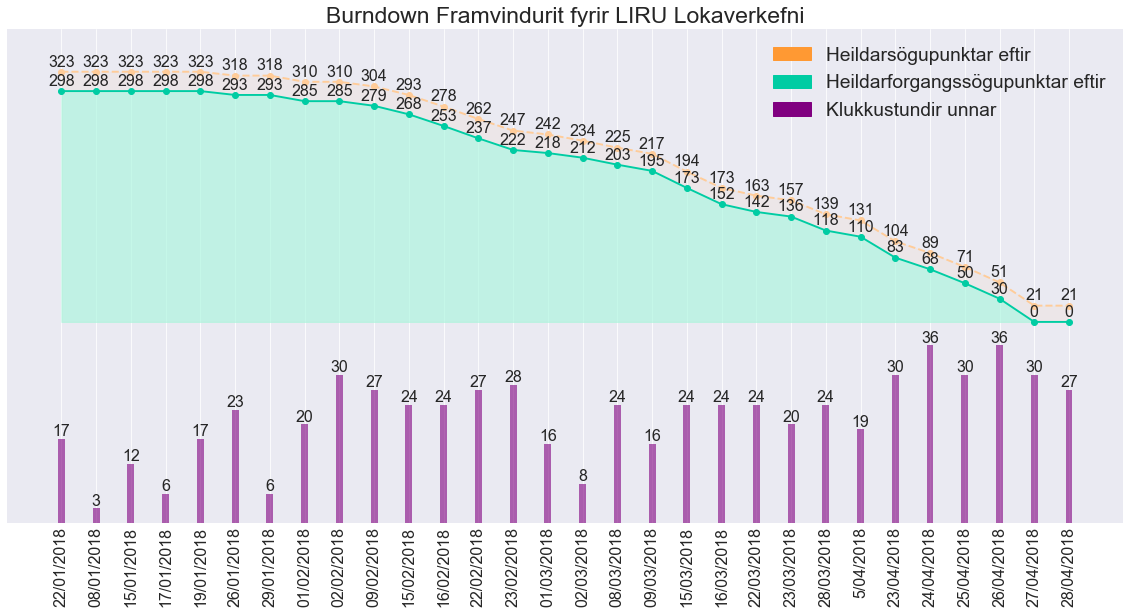

In [26]:
plotBurndownChartForAllSprints()
plt.show()

Eftirfarandi myndir sýna niðurstöður kaffineyslu teymismeðlima á meðan verkefninu stóð - í fyrsta lagi mun á föstudögum og fimmtudögum og í öðru lagi hver neytti mestu kaffi yfir verkefnið

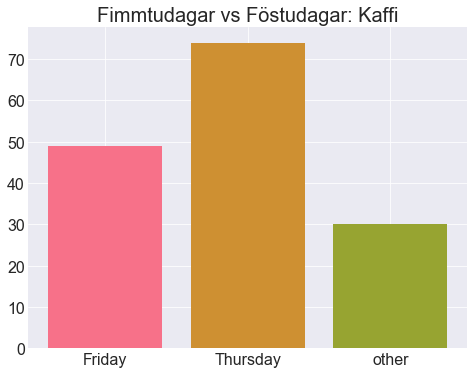

In [27]:
thursdaysVsFridaysCoffeePieChart()
plt.show()

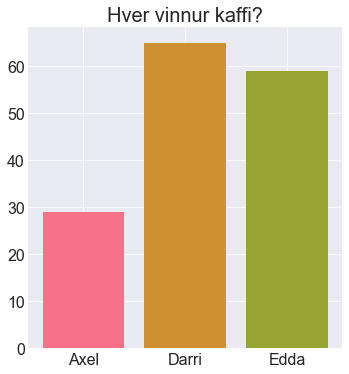

In [28]:
whoWinsCoffeePlot()
plt.show()

In [35]:
print("Total coffee: " + str(CoffeTracker.Edda.sum() + CoffeTracker.Darri.sum() + CoffeTracker.Axel.sum()))

Total coffee: 153
